In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
header = ["age", "Job-type", "fnlwgt", "edu", "edu-num", "marital-status", "Job", "Relationship", "race", "sex", "gain", "loss", "hrs/week", "naive", "income"]
df = pd.read_csv('adult/adult.data', low_memory = False, names=header)
df.head()

,age,Job-type,fnlwgt,edu,edu-num,marital-status,Job,Relationship,race,sex,gain,loss,hrs/week,naive,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


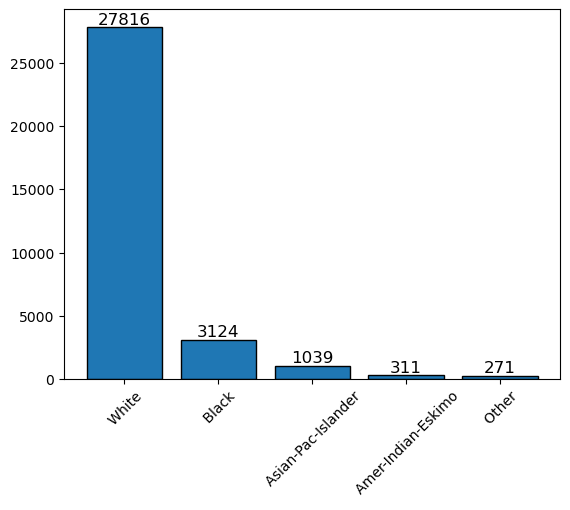

In [5]:
count = df['race'].value_counts()
bars = plt.bar(df['race'].unique(), count, edgecolor='black', align='center')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
             ha='center', va='bottom', fontsize=12)
plt.show()

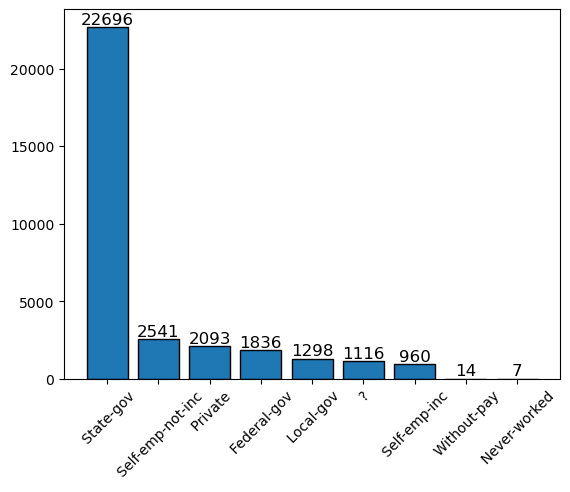

In [6]:
count = df['Job-type'].value_counts()
bars = plt.bar(df['Job-type'].unique(), count, edgecolor='black', align='center')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
             ha='center', va='bottom', fontsize=12)
plt.show()

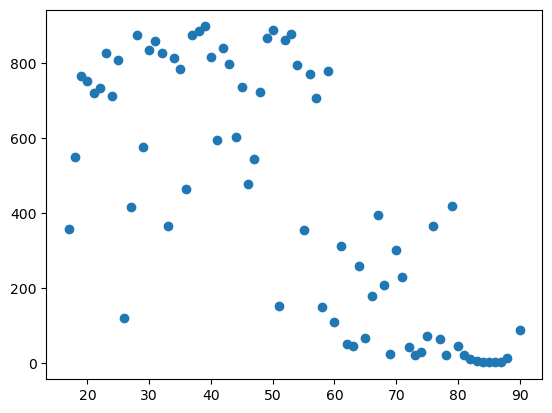

In [7]:
count = df['age'].value_counts()
plt.scatter(df['age'].unique(), count)
plt.show()

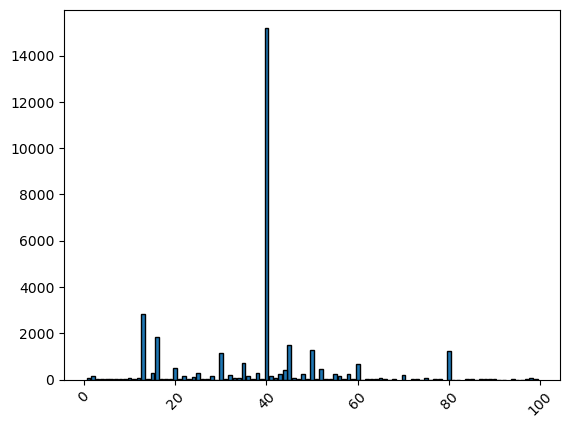

Mean:  40.437455852092995
Median:  40.0
Variance:  152.45899505042865
SD:  12.34742868173081
MAX:  99
MAX:  1
32561


In [8]:
count = df['hrs/week']
bars = plt.bar(df['hrs/week'].unique(), count.value_counts(), edgecolor='black', align='center')
plt.xticks(rotation=45)
plt.show()
print("Mean: ", count.mean())
print("Median: ", count.median())
print("Variance: ", count.var())
print("SD: ", count.std())
print("MAX: ", count.max())
print("MAX: ", count.min())
print(df["hrs/week"].count())

In [9]:
df[df["hrs/week"] == 99].count()

age               85
Job-type          85
fnlwgt            85
edu               85
edu-num           85
marital-status    85
Job               85
Relationship      85
race              85
sex               85
gain              85
loss              85
hrs/week          85
naive             85
income            85
dtype: int64

In [10]:
df["income_2"] = df["income"].apply(lambda x: 1 if x == " <=50K" else 0)
print(df["age"].min(), " ", df["age"].max())

17   90


C:\Users\Pc\AppData\Local\Temp\ipykernel_16960\564922789.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = df.groupby(["age_bind", "income"]).size().unstack().fillna(0)


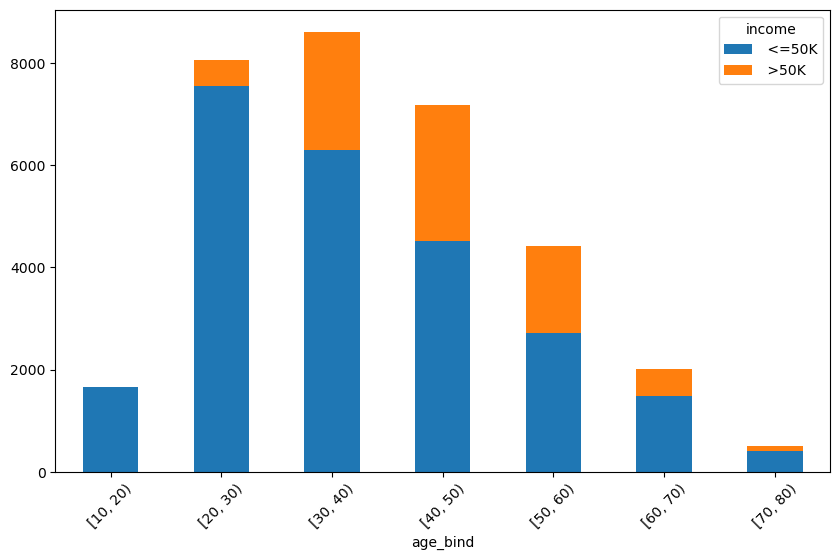

In [11]:
bins = list(range(10, 90, 10))
df["age_bind"] = pd.cut(df["age"], bins=bins, right=False)
agg_data = df.groupby(["age_bind", "income"]).size().unstack().fillna(0)
ax = agg_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xticks(rotation=45)
plt.savefig('age.png', dpi=300, bbox_inches='tight')
plt.rcParams.update({'font.size': 20})
plt.show()

In [12]:
x_values = df['edu'].unique().tolist()
edu_levels: [str] = [" Preschool", " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th", " HS-grad", " Some-college", " Assoc-acdm", " Assoc-voc", " Bachelors", " Masters", " Prof_school", " Doctorate"]
print(x_values)

[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']


C:\Users\Pc\AppData\Local\Temp\ipykernel_16960\2181745851.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = df.groupby(["edu", "income"]).size().unstack(fill_value=0)


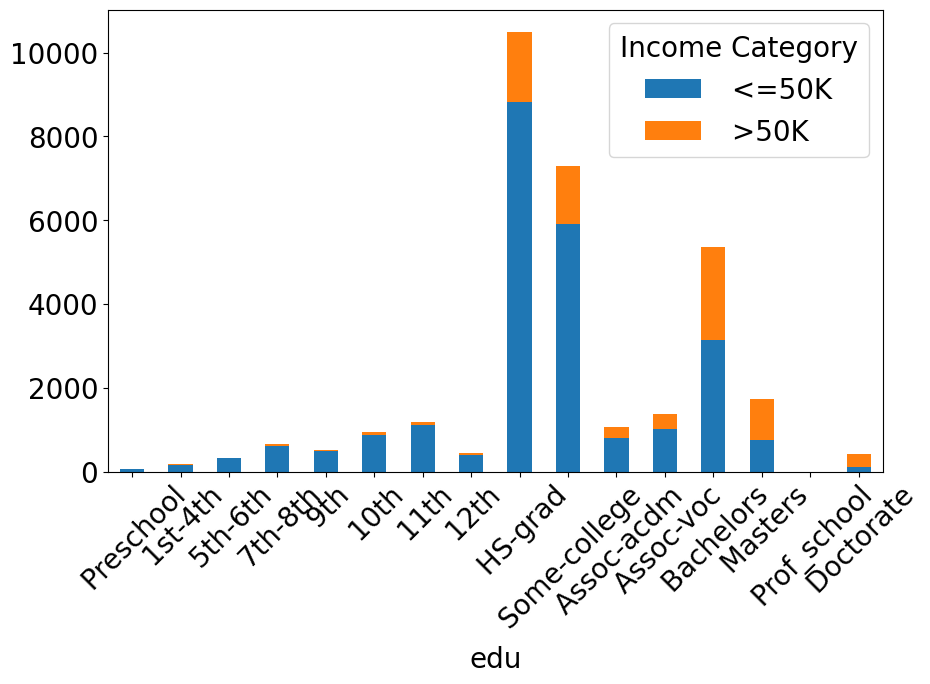

In [13]:
df['edu'] = pd.Categorical(df['edu'], categories=edu_levels, ordered=True)

# Aggregate data and plot
agg_data = df.groupby(["edu", "income"]).size().unstack(fill_value=0)
ax = agg_data.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.xticks(rotation=45)
ax.legend(title="Income Category")
plt.savefig('edu.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_16960\2552995144.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = df.groupby(["edu", "income"]).size().unstack(fill_value=0)


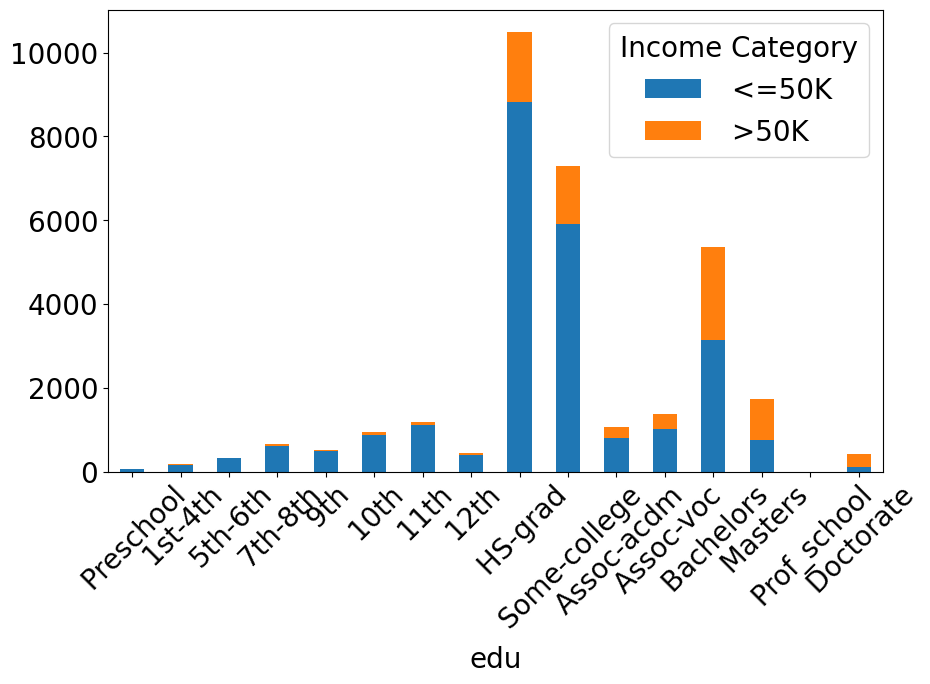

In [14]:
#edu_levels: [str] = ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Some-college", "Assoc-acdm", "Assoc-voc", "Bachelors", "Masters", "Prof_school", "Doctorate"]
agg_data = df.groupby(["edu", "income"]).size().unstack(fill_value=0)
ax = agg_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xticks(rotation=45)
ax.legend(title="Income Category")
plt.show()

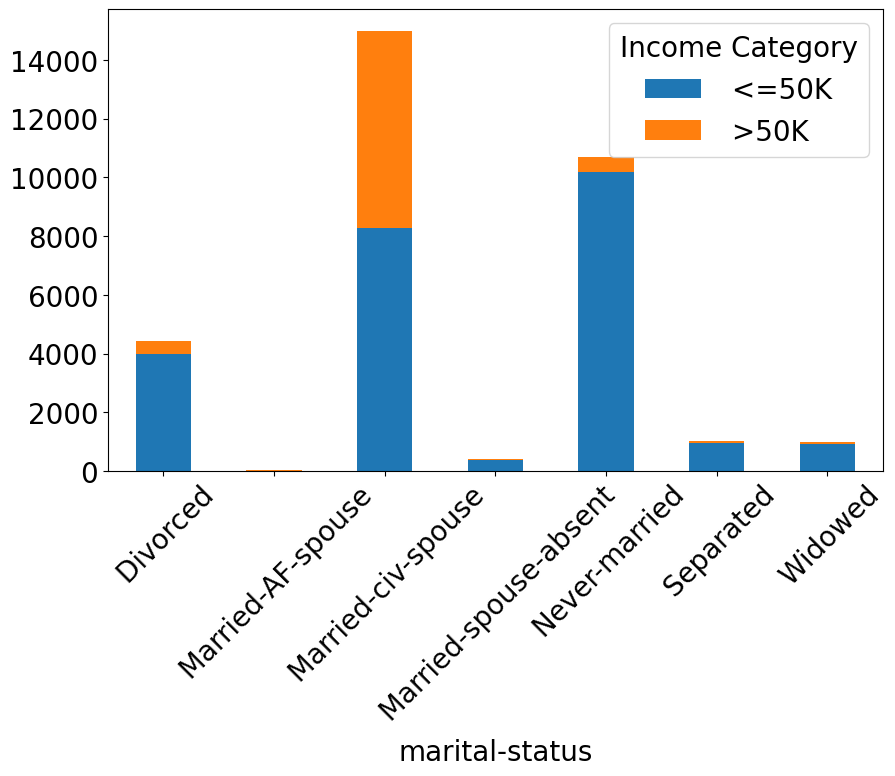

In [29]:
agg_data = df.groupby(["marital-status", "income"]).size().unstack(fill_value=0)
ax = agg_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xticks(rotation=45)
ax.legend(title="Income Category")
plt.show()

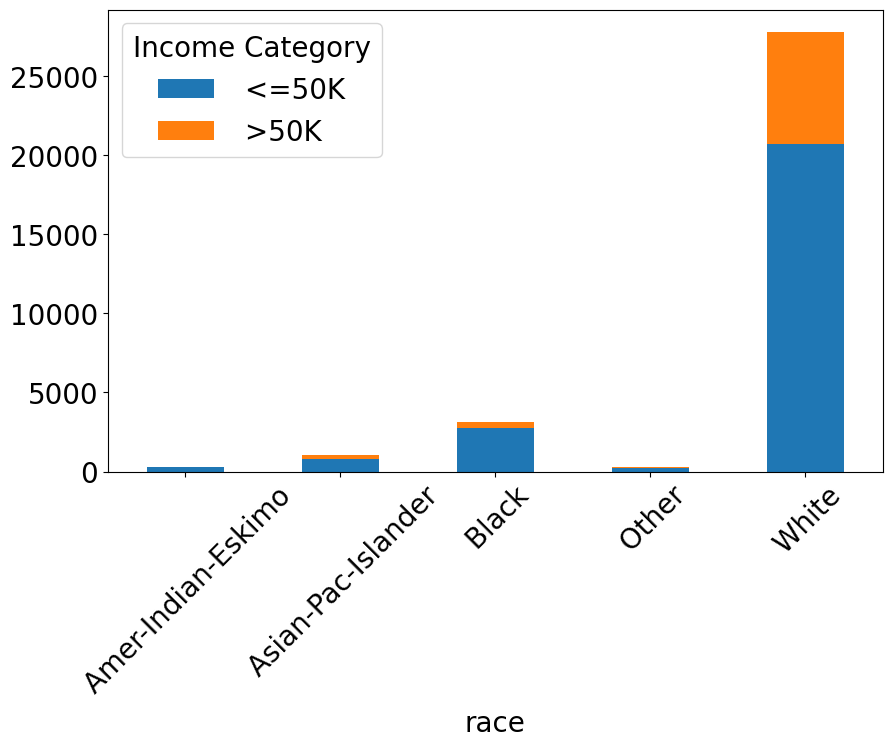

In [49]:
agg_data = df.groupby(["race", "income"]).size().unstack(fill_value=0)
ax = agg_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xticks(rotation=45)
ax.legend(title="Income Category")
plt.savefig('race.png', dpi=300, bbox_inches='tight')
plt.show()

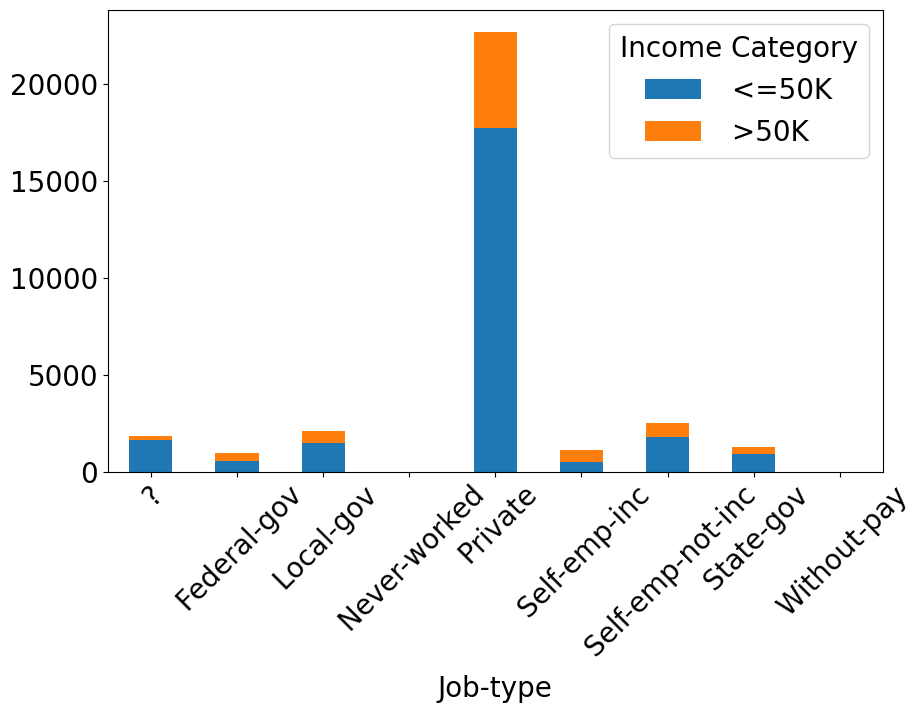

In [33]:
agg_data = df.groupby(['Job-type', "income"]).size().unstack(fill_value=0)
ax = agg_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xticks(rotation=45)
ax.legend(title="Income Category")
plt.savefig('type.png', dpi=300, bbox_inches='tight')
plt.show()

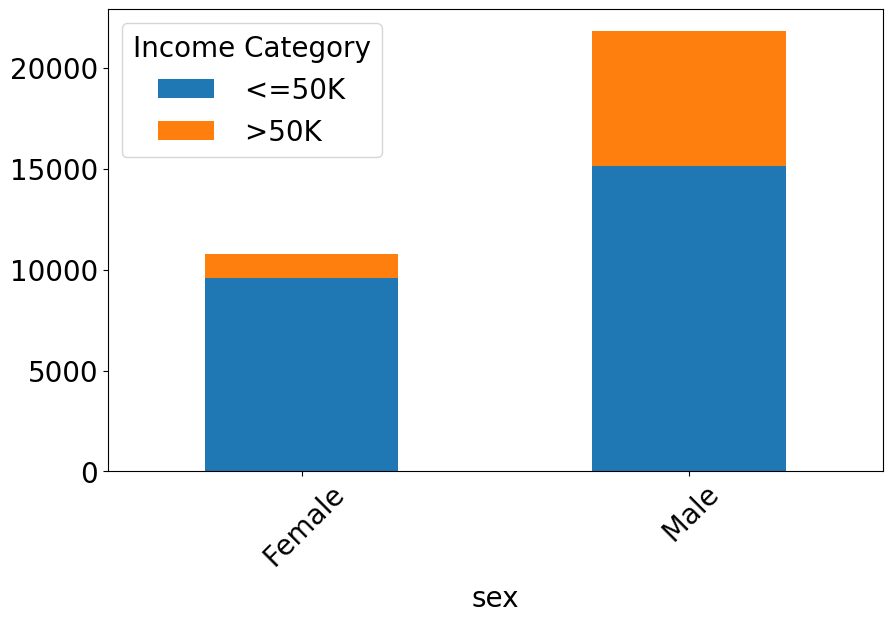

In [35]:
agg_data = df.groupby(['sex', "income"]).size().unstack(fill_value=0)
ax = agg_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xticks(rotation=45)
ax.legend(title="Income Category")
plt.savefig('sex.png', dpi=300, bbox_inches='tight')

plt.show()

income                        <=50K    >50K
naive                                      
Cambodia                       12.0     7.0
Canada                         82.0    39.0
China                          55.0    20.0
Columbia                       57.0     2.0
Cuba                           70.0    25.0
Dominican-Republic             68.0     2.0
Ecuador                        24.0     4.0
El-Salvador                    97.0     9.0
England                        60.0    30.0
France                         17.0    12.0
Germany                        93.0    44.0
Greece                         21.0     8.0
Guatemala                      61.0     3.0
Haiti                          40.0     4.0
Holand-Netherlands              1.0     NaN
Honduras                       12.0     1.0
Hong                           14.0     6.0
Hungary                        10.0     3.0
India                          60.0    40.0
Iran                           25.0    18.0
Ireland                        1

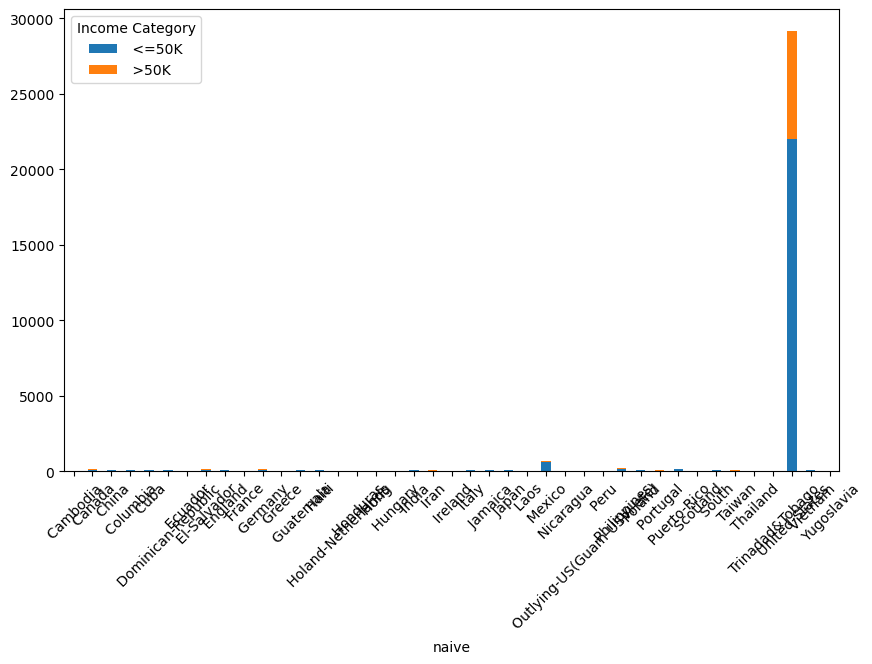

In [65]:
new_df = df[df["naive"] != " ?"]
agg_data = new_df.groupby(['naive', "income"]).size().unstack()
print(agg_data)
ax = agg_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xticks(rotation=45)
ax.legend(title="Income Category")
plt.show()

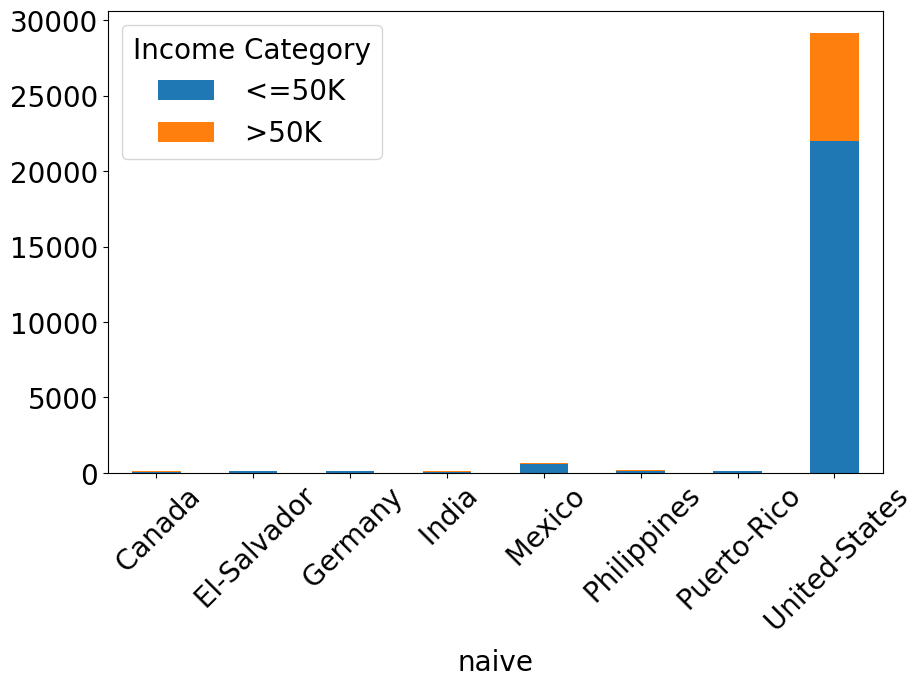

In [47]:
new_df = df[df["naive"] != " ?"]
agg_data = new_df.groupby(['naive', "income"]).size().unstack()
agg_data = agg_data[agg_data.sum(axis=1) >= 100]  # Only keep rows where sum is >= 10

# Plot the data
ax = agg_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xticks(rotation=45)
ax.legend(title="Income Category")
plt.savefig('countries.png', dpi=300, bbox_inches='tight')
plt.show()